# Alberto Dicembre, Assignment #4

This is my (very) dirty but working implementation of a Bayesian Network. I decided to model my typical morning (in a day with no lectures), after some testing of the functionalities. All variables have a binomial distribution (values "True" or "False"). Then I performed some Ancestral Sampling and took a look at the results.

In [ ]:
from bayesian_network import BayesianNetwork

## Testing the Network

In [ ]:
net = BayesianNetwork(values=["True", "False"])
net.add_node("A")
net.add_node("B")
net.add_node("C")

In [ ]:
print(net)
net.check_valid()

Nodes: dict_keys(['A', 'B', 'C', 'D']), Edges: {'A': ['B'], 'B': ['C'], 'D': ['C']}, Tables: {'A': {'Prior': (0.5, 0.5)}, 'B': {'Prior': (0.5, 0.5)}, 'C': {'Prior': (0.5, 0.5)}, 'D': {'Prior': (0.9, 0.1)}}
Node B probability table doesn't match parents' number of values
Node C probability table doesn't match parents' number of values


False

In [ ]:
net.add_edge("A", ["B"])
net.add_edge("B", ["C"])
print(net)

Nodes: dict_keys(['A', 'B', 'C', 'D']), Edges: {'A': ['B'], 'B': ['C'], 'D': ['C']}, Tables: {'A': {'Prior': (0.5, 0.5)}, 'B': {'Prior': (0.5, 0.5)}, 'C': {'Prior': (0.5, 0.5)}, 'D': {'Prior': (0.9, 0.1)}}


In [ ]:
net.check_valid()

Node B probability table doesn't match parents' number of values
Node C probability table doesn't match parents' number of values


False

#### Checking Topological Sort

In [ ]:
print(net.topo_sort())

['A', 'D', 'B', 'C']


In [ ]:
net.add_prob_table("A", {"Prior" : (0.9, 0.1)})
net.add_prob_table("B", {"True" : (0.8, 0.2), "False" : (0.2, 0.8)})

#### Trying to add a probability table for a node not in the network

In [ ]:
net.add_prob_table("D", {"Prior" : (0.9, 0.1)})

### Now we create a valid network

In [ ]:
net.add_node("D")
net.add_edge("D", ["C"])
net.add_prob_table("C", {("True", "True") : (0.95, 0.05),
                         ("True", "False") : (0.7, 0.3),
                         ("False", "True") : (0.7, 0.3),
                         ("False", "False") : (0.1, 0.9)})
net.add_prob_table("D", {"Prior" : (0.9, 0.1)})

print(net)
net.check_valid()

Nodes: dict_keys(['A', 'B', 'C', 'D']), Edges: {'A': ['B'], 'B': ['C'], 'D': ['C']}, Tables: {'A': {'Prior': (0.9, 0.1)}, 'B': {'True': (0.8, 0.2), 'False': (0.2, 0.8)}, 'C': {('True', 'True'): (0.95, 0.05), ('True', 'False'): (0.7, 0.3), ('False', 'True'): (0.7, 0.3), ('False', 'False'): (0.1, 0.9)}, 'D': {'Prior': (0.9, 0.1)}}


True

#### Let's try some single node sampling

In [ ]:
probs = net.get_probabilities("A") # remember, we gave A probabilities of 0.9 for True, 0.1 for False
print(probs)
for i in range(20):
    print(net.sample(probs))

(0.9, 0.1)
True
True
True
True
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True


### Now we try Ancestral Sampling

In [ ]:
samples = net.ancestral_sampling(10)
for i, sample in enumerate(samples):
    print(f"{i}: {sample}")

Topological sort: ['A', 'D', 'B', 'C']
0: {'A': 'True', 'D': 'True', 'B': 'True', 'C': 'False'}
1: {'A': 'True', 'D': 'True', 'B': 'True', 'C': 'True'}
2: {'A': 'True', 'D': 'True', 'B': 'True', 'C': 'False'}
3: {'A': 'True', 'D': 'True', 'B': 'True', 'C': 'True'}
4: {'A': 'True', 'D': 'True', 'B': 'True', 'C': 'True'}
5: {'A': 'True', 'D': 'True', 'B': 'True', 'C': 'True'}
6: {'A': 'True', 'D': 'True', 'B': 'True', 'C': 'True'}
7: {'A': 'True', 'D': 'True', 'B': 'False', 'C': 'True'}
8: {'A': 'True', 'D': 'True', 'B': 'True', 'C': 'True'}
9: {'A': 'False', 'D': 'True', 'B': 'False', 'C': 'True'}


# Modeling (some aspects of) my morning routine

The network will represent the following structure:

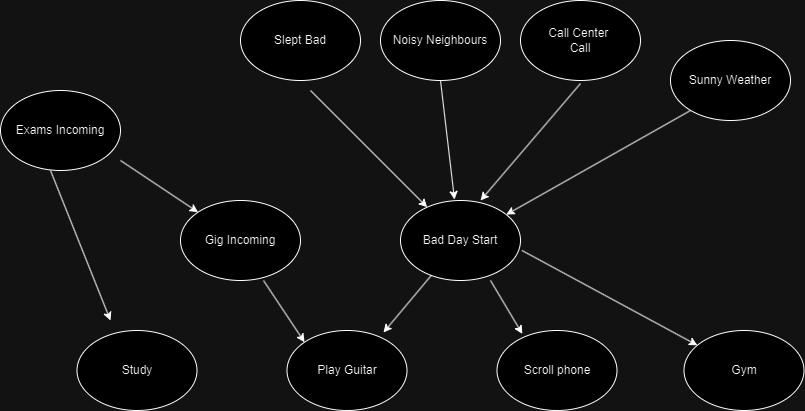![]https://drive.google.com/uc?export=view&id=1ohR33DM3o0Zn0IFJm1toh-21XPSebtXA

These are the typical variables that influence an average morning of mine, in a day with no lectures.

Of course, as "ancestor" nodes we have all those random variables that can influence my mood (Bad day start), which is the intermediate concept that will influence what activity I will perform during that morning.

## Some quick explanation

#### Exams incoming -> Gig incoming -> Play guitar
I play guitar in a band. I am typically less prone to have incoming gigs in exams period, since I give more priority to university.
So when I have gigs incoming I will practice more often, when I have exams I will probably dedicate more morning time to study.

#### Bad day start -> Play guitar
I enjoy playing guitar much more when I am in a good mood, therefore the probability of me playing is higher when "Bad day start" is False.

Same applies for Gym; I would likely do it in the afternoon instead.

#### Bad day start -> Scroll phone
I am more prone to get on the phone and waste time scrolling through social media when I feel groggy / am in a bad mood.

#### Sunny weather -> Bad day start
I'm more likely to be in a good mood if the weather is sunny


In [ ]:
daily_net = BayesianNetwork(nodes = {}, edges= {}, ordering= {}, values=["True", "False"])
daily_net.add_node("Noisy neighbors")
daily_net.add_node("Exams incoming")
daily_net.add_node("Bad day start")
daily_net.add_node("Call center call")
daily_net.add_node("Slept bad")
daily_net.add_node("Gig incoming")
daily_net.add_node("Sunny weather")
daily_net.add_node("Study")
daily_net.add_node("Play guitar")
daily_net.add_node("Scroll phone")
daily_net.add_node("Gym")

In [ ]:
daily_net.add_edge("Exams incoming", ["Gig incoming", "Study"])
daily_net.add_edge("Slept bad", ["Bad day start"])
daily_net.add_edge("Noisy neighbors", ["Bad day start"])
daily_net.add_edge("Call center call", ["Bad day start"])
daily_net.add_edge("Sunny weather", ["Bad day start"])
daily_net.add_edge("Bad day start", ["Play guitar", "Scroll phone", "Gym"])
daily_net.add_edge("Gig incoming", ["Play guitar"])

In [ ]:
# Determining prior probabilities
daily_net.add_prob_table("Exams incoming", {"Prior" : (0.1, 0.9)})
daily_net.add_prob_table("Noisy neighbors", {"Prior" : (0.3, 0.7)})
daily_net.add_prob_table("Slept bad", {"Prior" : (0.2, 0.8)})
daily_net.add_prob_table("Call center call", {"Prior" : (0.2, 0.8)})
daily_net.add_prob_table("Sunny weather", {"Prior" : (0.5, 0.5)})

In [ ]:
daily_net.add_prob_table("Gig incoming", {"True" : (0.05, 0.95), "False" : (0.1, 0.9)}) # P(Gig incoming | Exams incoming)

daily_net.add_prob_table("Bad day start", {("True", "True", "True", "True") : (0.95, 0.05), # P(Bad day start | Slept bad, Noisy neighbors, Call center call, Sunny)
                                            ("False", "True", "True", "True") : (0.9, 0.1),
                                            ("True", "False", "True", "True") : (0.85, 0.15),
                                            ("True", "True", "False", "True") : (0.8, 0.2),
                                            ("True", "True", "True", "False") : (0.99, 0.01),
                                            ("False", "False", "True", "True") : (0.6, 0.4),
                                            ("True", "False", "False", "True") : (0.4, 0.6),
                                            ("True", "True", "False", "False") : (0.6, 0.4),
                                            ("False", "True", "False", "True") : (0.4, 0.6),
                                            ("True", "False", "True", "False") : (0.7, 0.3),
                                            ("False", "True", "True", "False") : (0.9, 0.1),
                                            ("False", "False", "False", "True") : (0.05, 0.95),
                                            ("True", "False", "False", "False") : (0.2, 0.8),
                                            ("False", "True", "False", "False") : (0.3, 0.7),
                                            ("False", "False", "True", "False") : (0.3, 0.7),
                                            ("False", "False", "False", "False") : (0.1, 0.9),
                                            })

daily_net.add_prob_table("Study", {"True" : (0.9, 0.1), "False" : (0.2, 0.8)}) # P(Study | Exams incoming)

daily_net.add_prob_table("Play guitar", {("True", "True") : (0.7, 0.3), # P(Play guitar | Gig incoming, Bad day start)
                                          ("True", "False") : (0.9, 0.1),
                                          ("False", "True") : (0.2, 0.8),
                                          ("False", "False") : (0.6, 0.4)})
daily_net.add_prob_table("Scroll phone", {"True" : (0.7, 0.3), "False" : (0.4, 0.6)}) # P(Scroll phone | Bad day start)

daily_net.add_prob_table("Gym", {("True") : (0.3, 0.7), # P(Gym | Bad day start)
                                 ("False") : (0.6, 0.4)})

In [ ]:
# define ordering of parents for conditioned nodes wrt probability tables. Very dirty, should be done in a better way

daily_net.add_ordering({"Bad day start" : ("Slept bad", "Noisy neighbors", "Call center call", "Sunny weather"),
                        "Play guitar" : ("Gig incoming", "Bad day start")})

## Let's run some Ancestral Sampling on this one

In [ ]:
samples = daily_net.ancestral_sampling(100)
for i, sample in enumerate(samples):
    print(f"{i}: {sample}")

Topological sort: ['Noisy neighbors', 'Exams incoming', 'Call center call', 'Slept bad', 'Sunny weather', 'Gig incoming', 'Study', 'Bad day start', 'Play guitar', 'Scroll phone', 'Gym']
0: {'Noisy neighbors': 'False', 'Exams incoming': 'False', 'Call center call': 'False', 'Slept bad': 'False', 'Sunny weather': 'True', 'Gig incoming': 'False', 'Study': 'False', 'Bad day start': 'False', 'Play guitar': 'True', 'Scroll phone': 'False', 'Gym': 'True'}
1: {'Noisy neighbors': 'True', 'Exams incoming': 'True', 'Call center call': 'False', 'Slept bad': 'False', 'Sunny weather': 'True', 'Gig incoming': 'False', 'Study': 'True', 'Bad day start': 'False', 'Play guitar': 'True', 'Scroll phone': 'True', 'Gym': 'True'}
2: {'Noisy neighbors': 'False', 'Exams incoming': 'False', 'Call center call': 'False', 'Slept bad': 'True', 'Sunny weather': 'False', 'Gig incoming': 'False', 'Study': 'False', 'Bad day start': 'True', 'Play guitar': 'False', 'Scroll phone': 'True', 'Gym': 'False'}
3: {'Noisy neighb

## Calculating obtained occurrences for each node

Let's write a function that calculates the percentages of each node being observed over the samples

In [ ]:
print(f"{daily_net.get_occurrences(samples)} \n")

{'Noisy neighbors': 0.36, 'Exams incoming': 0.16, 'Bad day start': 0.27, 'Call center call': 0.19, 'Slept bad': 0.1, 'Gig incoming': 0.11, 'Sunny weather': 0.48, 'Study': 0.27, 'Play guitar': 0.56, 'Scroll phone': 0.39, 'Gym': 0.53} 



### Repeating with a higher number of samples
Giving a quick look at the sampled probabilities, they reflect the expected probabilities more, given the higher number of samples

In [ ]:
samples = daily_net.ancestral_sampling(1000)
print(f"{daily_net.get_occurrences(samples)} \n")

Topological sort: ['Noisy neighbors', 'Exams incoming', 'Call center call', 'Slept bad', 'Sunny weather', 'Gig incoming', 'Study', 'Bad day start', 'Play guitar', 'Scroll phone', 'Gym']
{'Noisy neighbors': 0.286, 'Exams incoming': 0.095, 'Bad day start': 0.31, 'Call center call': 0.205, 'Slept bad': 0.196, 'Gig incoming': 0.109, 'Sunny weather': 0.505, 'Study': 0.273, 'Play guitar': 0.536, 'Scroll phone': 0.473, 'Gym': 0.495} 



# Final considerations



The developing of a Bayesian Network by scratch has helped a lot in fully understanding the concepts behind it. Ancestral Sampling can be used to estimate the full joint probability distribution described by the structure, or to generate synthethic training data for learning models. It's easy to implement and computationally affordable. As a downside, the "reliability" of a Probabilistic Model is deeply reflected by its structure and parameters. Also, as we know, a Bayesian Network cannot model relationships with cycles, so we have to keep that in mind.

## Possible analysis improvements

To further enhance the possibilities offered by this kind of structure, it would be useful to add more Bayesian Network algorithms.
for example, the ability to retrieve the probability of a node being observed, given another observed node. (e.g. "What is the probability of me spending the morning scrolling the phone by knowing that I got waken up by a call center?"). Perhaps with a user-friendly interface that allows the user to create and manipulate the graph, inserting values and seeing the results in real time.

Other examples are marginalization, inference, or joint probability.
In the last case, we could maybe define an epsilon for error tolerance and see how many Ancestral Sampling iterations are needed to get the expected joint distribution.

Of course, using parameters learned by data would be much more representative of the real world.

It would also be fun to experiment with more complex structures, or multinomial distributions.